In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('All libraries are imported.')



All libraries are imported.


In [3]:
resume_data = pd.read_csv(r"C:\Users\kushal cherukula\Downloads\UpdatedResumeDataSet.csv\UpdatedResumeDataSet.csv")
resume_data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:


resume_data.isnull().sum()



Category    0
Resume      0
dtype: int64

In [6]:
resume_data.columns

Index(['Category', 'Resume'], dtype='object')

In [7]:
resume_data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [8]:


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Preprocess the data
# Convert text data to numerical features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(resume_data['Resume'])
y = resume_data['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("the no of x training data",X_train.shape[0])
print("the no of y training data",y_train.shape[0])
print("the no of x testing data",X_test.shape[0])
print("the no of y testing data",y_test.shape[0])

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


the no of x training data 769
the no of y training data 769
the no of x testing data 193
the no of y testing data 193
Accuracy: 0.9844559585492227
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      0.60      0.75         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00  

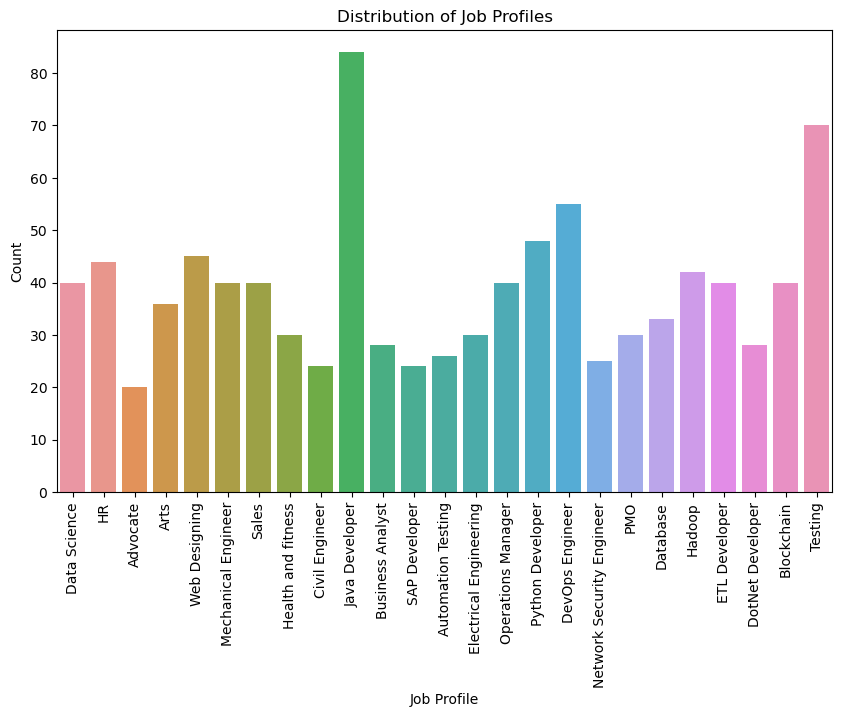

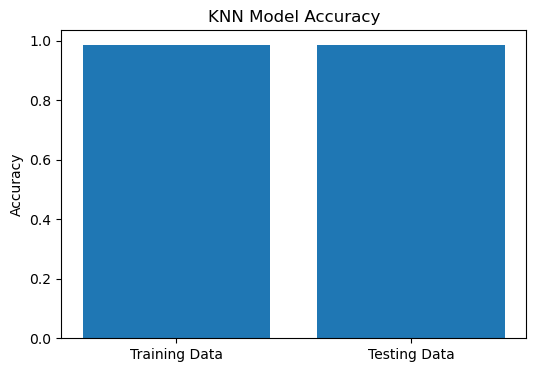

In [9]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=resume_data)
plt.title('Distribution of Job Profiles')
plt.xlabel('Job Profile')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Training Data', 'Testing Data'], [knn.score(X_train, y_train), accuracy])
plt.title('KNN Model Accuracy')
plt.ylabel('Accuracy')
plt.show()


In [10]:
import joblib

# Assuming `model` is your trained model
joblib.dump(knn, 'model.pkl')

['model.pkl']

In [12]:
joblib.dump(tfidf, 'tfid.pkl')

['tfid.pkl']